<div dir="rtl">
    ابتدا کتابخانه finpy-tse را برای دریافت داده های بورسی نصب می کنیم:
</div>

In [ ]:
pip install finpy-tse

<div dir="rtl">
    این کتابخانه را برای استفاده وارد می کنیم:
</div>

In [3]:
import finpy_tse as fpy

<div dir="rtl">
    برای نمونه داده های سهم پترول را از تاریخ 1398 تا 1401 دریافت می کنیم:
</div>

In [6]:
df = fpy.Get_Price_History(stock = 'پترول', start_date = '1398-12-15', end_date='1401-02-21',\
                                         ignore_date = True, adjust_price = True, show_weekday = False, double_date = True)
df

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
J-Date,,,,,,,,,,,,,,,,,
1390-10-19,2012-01-09,1510,2000,1350,1500,1424,7696000,10957338039,974,پترول,گروه پتروشیمی س. ایرانیان,پایه زرد,207,274,185,206,195
1390-10-20,2012-01-10,1495,1495,1495,1495,1495,162000,242190000,17,پترول,گروه پتروشیمی س. ایرانیان,پایه زرد,205,205,205,205,205
1390-10-21,2012-01-11,1569,1569,1569,1569,1569,36200,56797800,8,پترول,گروه پتروشیمی س. ایرانیان,پایه زرد,215,215,215,215,215
1390-10-25,2012-01-15,1647,1647,1647,1647,1647,35000,57645000,7,پترول,گروه پتروشیمی س. ایرانیان,پایه زرد,226,226,226,226,226
1390-10-26,2012-01-16,1729,1729,1662,1729,1725,1959858,3380796784,340,پترول,گروه پتروشیمی س. ایرانیان,پایه زرد,237,237,228,237,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395-01-24,2016-04-12,1600,1623,1581,1599,1596,5739390,9162035367,618,پترول,گروه پتروشیمی س. ایرانیان,فرابورس,1600,1623,1581,1599,1596
1395-01-25,2016-04-13,1600,1600,1560,1579,1572,6841676,10755352825,630,پترول,گروه پتروشیمی س. ایرانیان,فرابورس,1600,1600,1560,1579,1572
1395-01-28,2016-04-16,1560,1561,1494,1494,1502,15242196,22898257271,1148,پترول,گروه پتروشیمی س. ایرانیان,فرابورس,1560,1561,1494,1494,1502


<div dir="rtl">
    کتابخانه های مورد نیاز برای ترسیم و پردازش داده ها را وارد می کنیم:
</div>

In [ ]:
import pandas as pd
import tensorflow
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

<div dir="rtl">
فرمت مقادیر ستون Date مربوط به این دیتاست را به “%Y-%m-%d” تغییر داده و سپس این ستون را به‌عنوان ایندکس دیتاست تعیین می‌کنیم. نمودار خروجی نحوه تغییر قیمت close را در طی سال‌های متوالی نشان می دهد. 
</div>

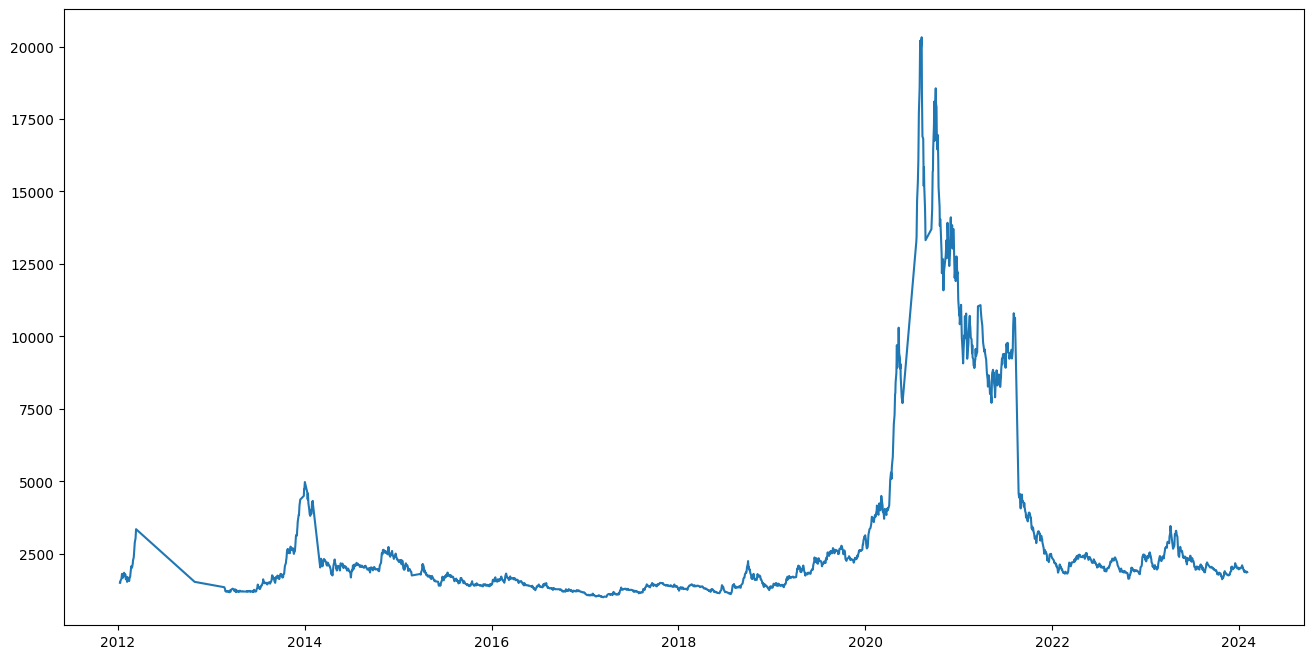

In [24]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

<div dir="rtl">
    پس ازاینکه دیتا فریم را به‌صورت صعودی مرتب نمودیم، یک دیتاست جدید با طول دیتاست قبلی و دو ستون Date و Close ایجاد میکنیم و ستون‌ها را بر اساس دیتا فریم قبلی مقداردهی میکنیم:
</div>

In [25]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
new_dataset

,Date,Close
0,2012-01-09 00:00:00,1500
1,2012-01-10 00:00:00,1495
2,2012-01-11 00:00:00,1569
3,2012-01-15 00:00:00,1647
4,2012-01-16 00:00:00,1729
...,...,...
2501,2024-01-28 00:00:00,1904
2502,2024-01-29 00:00:00,1879
2503,2024-01-30 00:00:00,1861
2504,2024-01-31 00:00:00,1853


<div dir="rtl">
    چون در مرحله بعدی می خواهیم نرمال سازی انجام دهیم و تابع نرمال سازی روی مقادیر عددی انجام می شود پس ستون Date را از دیتاست حذف می کنیم:
</div>

In [26]:
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values

<div dir="rtl">
    حال با استفاده از MinMaxScaler مقادیر عددی داده ها را نرمال‌سازی می‌کنیم تا در بازه ۰ تا ۱ قرار بگیرند:
</div>

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

<div dir="rtl">
    در این بخش داده ها را به دو بخش یادگیری و تست تقسیم می کنیم:
</div>

In [28]:
train_data=final_dataset[0:1880,:]
valid_data=final_dataset[1880:,:]

In [29]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

 <div dir="rtl">
از مدل شبکه عصبی LSTM استفاده می کنیم:
</div>

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=30,batch_size=15,verbose=2)

In [31]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]

for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [32]:
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

20/20 [==============================] - 1s 16ms/step


<div dir="rtl">
نمودار داده های پیش بینی شده و واقعی را رسم می کنیم، رنگ نارنجی قیمت پیش بینی شده و سبز قیمت واقعی است.
</div>

<ipython-input-35-c76f7ccca953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


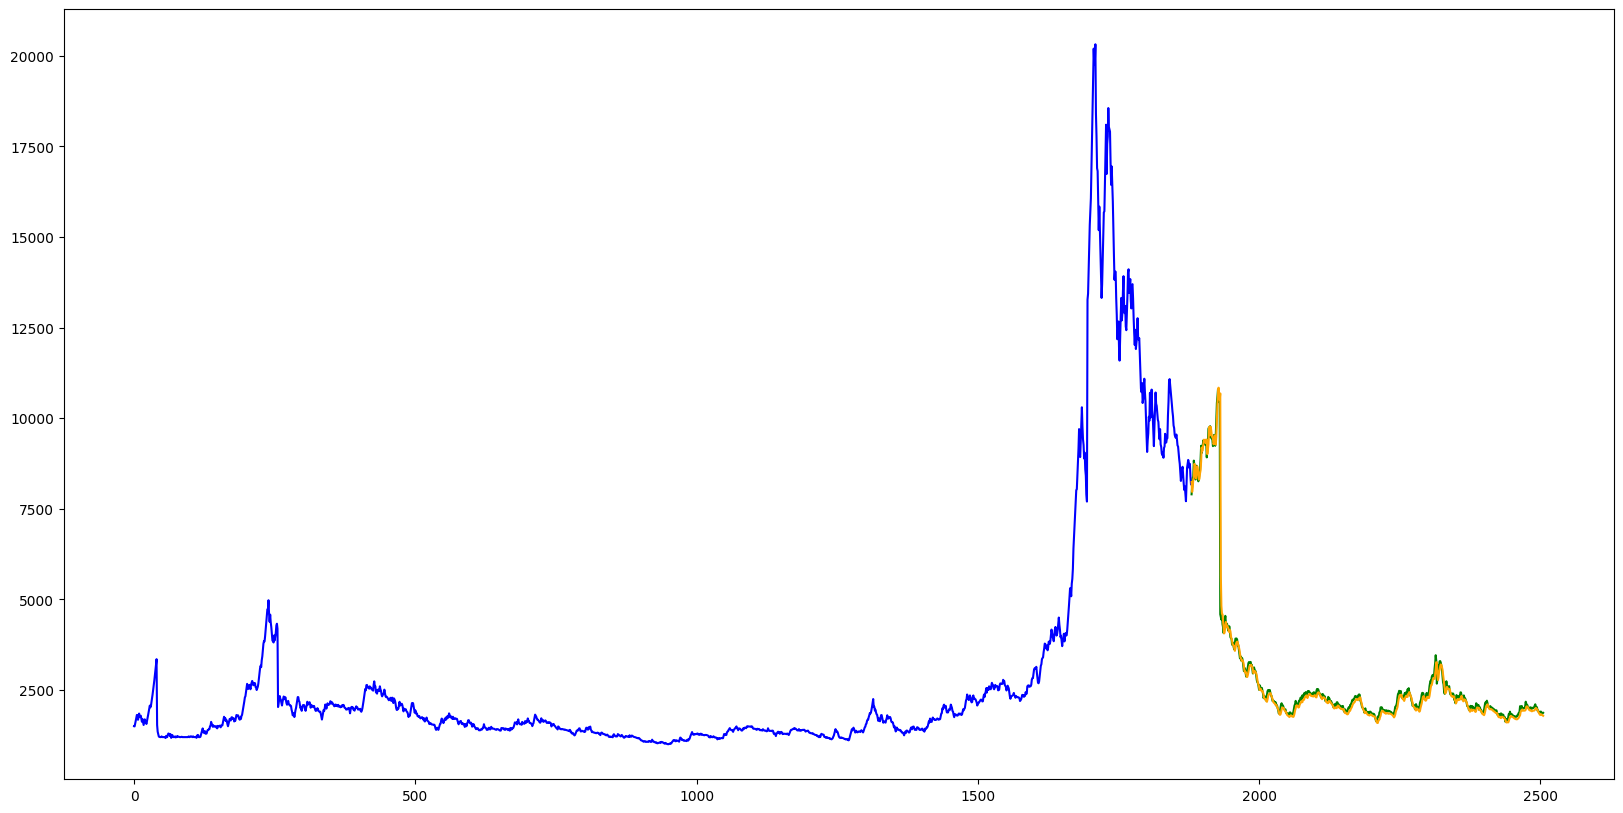

In [35]:
train_data=new_dataset[:1880]
valid_data=new_dataset[1880:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"],color='blue')
plt.plot(valid_data['Close'], color='green')
plt.plot(valid_data['Predictions'],color='orange')

plt.show()

<div dir="rtl">
حال از کتابخانه زیگزاگ برای رسم این اندیکاتور بر روی داده های موجود و پیش بینی شده استفاده می کنیم، بدین منظور ابتدا کتابخانه مربوط را وارد می کنیم:
</div>

In [ ]:
pip install zigzag

In [37]:
from zigzag import *

<div dir="rtl">
ترسیم زیگزاگ برای داده های واقعی:
</div>

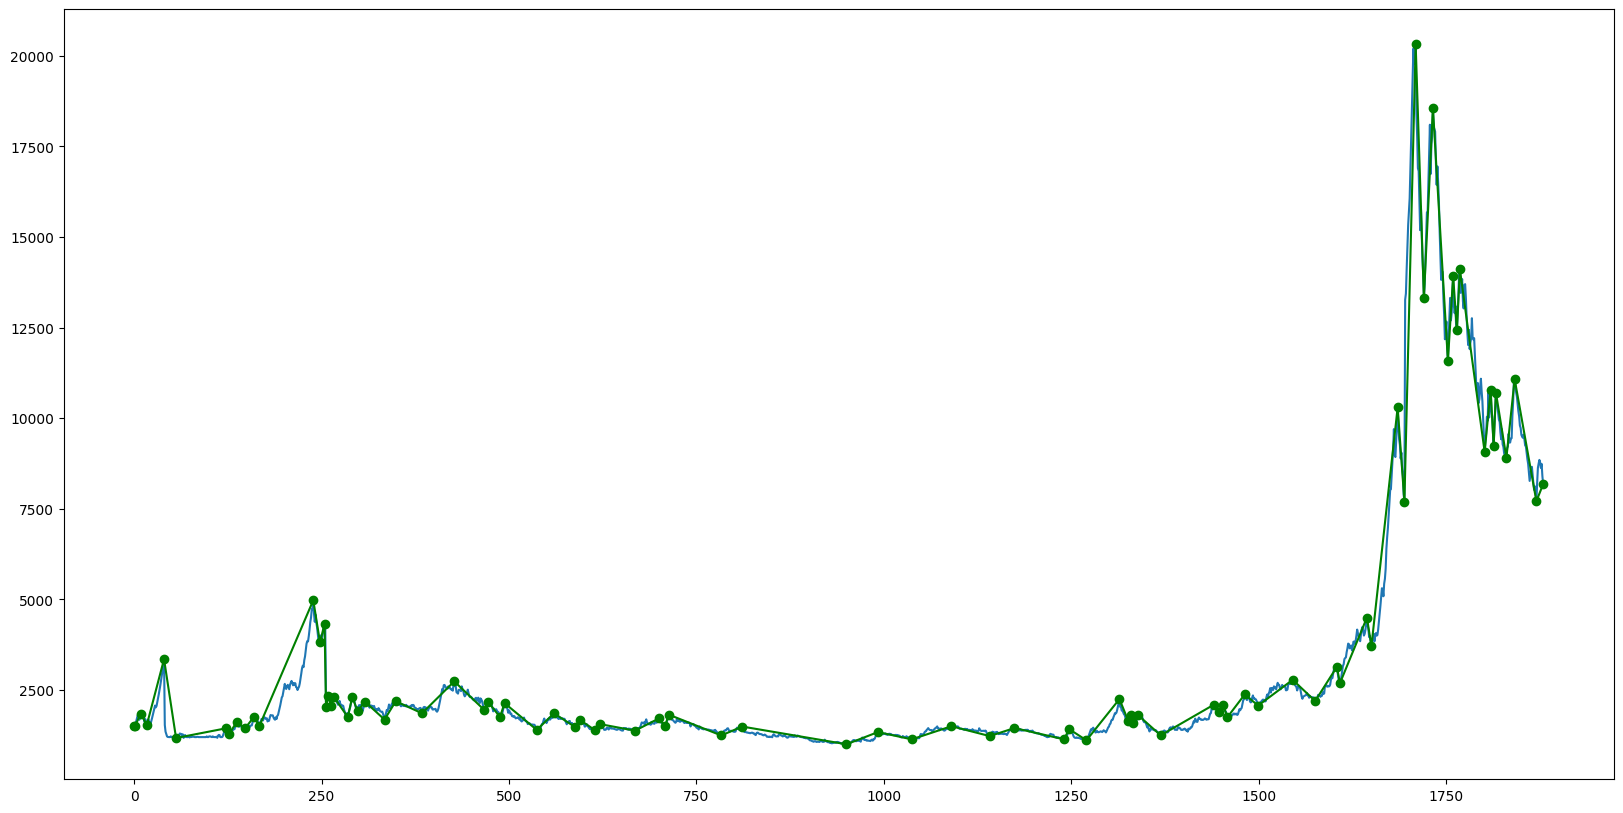

In [65]:
X = train_data["Close"]
pivots = peak_valley_pivots(X.values, 0.1, -0.1)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
X.plot()
ts_pivots.plot(style='g-o');

<div dir="rtl">
    ترسیم زیگزاگ برای داده های پیش بینی شده (آینده)
</div>

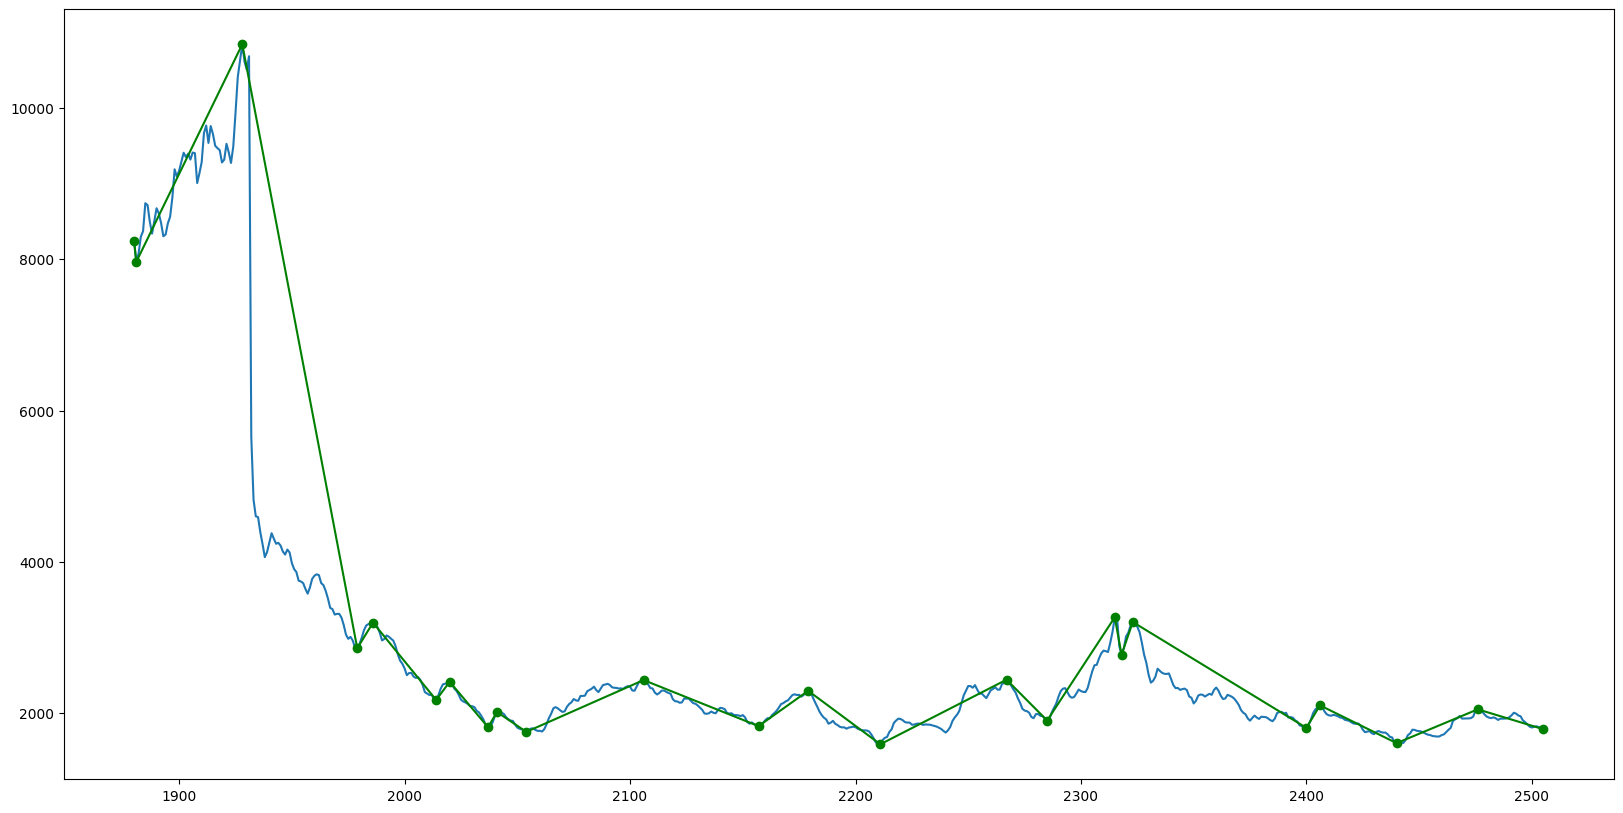

In [66]:
X = valid_data['Predictions'].apply(np.int64)
pivots = peak_valley_pivots(X.values, 0.1, -0.1)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
X.plot()
ts_pivots.plot(style='g-o');